 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [206]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [207]:
# Reading whale returns
whale_data = Path("whale_returns.csv")
whale = pd.read_csv(
    whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True
)
whale.sort_index(inplace=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [208]:
# Count nulls
whale.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [209]:
# Drop nulls
whale.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [210]:
# Reading algorithmic returns
algo_data = Path("algo_returns.csv")
algo = pd.read_csv(
    algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True
)
algo.sort_index(inplace=True)
algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [211]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [212]:
# Drop nulls
algo.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [213]:
# Reading S&P 500 Closing Prices
sp_data = Path("sp500_history.csv")
sp500 = pd.read_csv(
    sp_data, index_col="Date", infer_datetime_format=True, parse_dates=True
)
sp500.sort_index(inplace=True)
sp500.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [214]:
# Check Data Types
sp500['Close'].dtype

dtype('O')

In [215]:
# Fix Data Types
sp500['Close'] = sp500['Close'].str.replace('$', '')
sp500['Close'] = sp500['Close'].astype('float')
sp500['Close'].dtype

C:\Users\xjust\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

In [216]:
# Calculate Daily Returns
daily_returns = sp500.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [217]:
# Drop nulls
daily_returns.dropna(inplace=True)

In [218]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.columns=['S&P 500']
daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [219]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_prices = pd.concat([whale, algo, daily_returns], axis="columns", join="inner")
all_prices.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

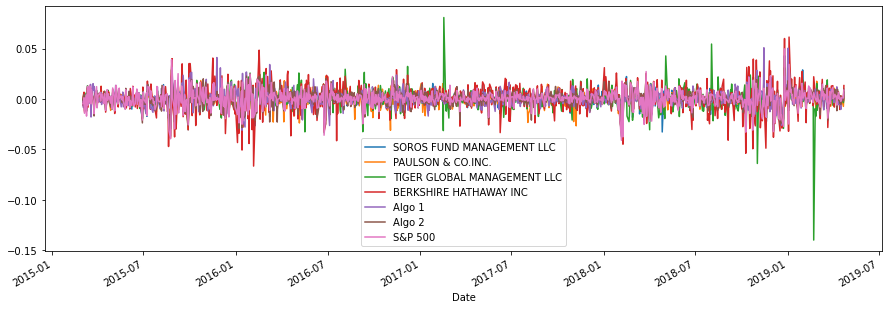

In [220]:
# Plot daily returns of all portfolios
all_prices.plot(figsize=(15,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

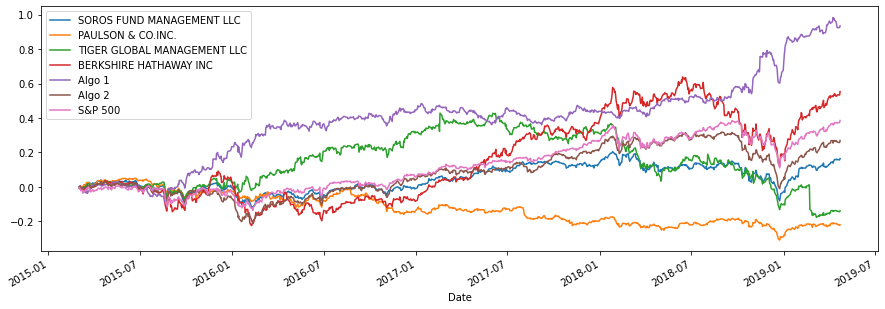

In [221]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_prices).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

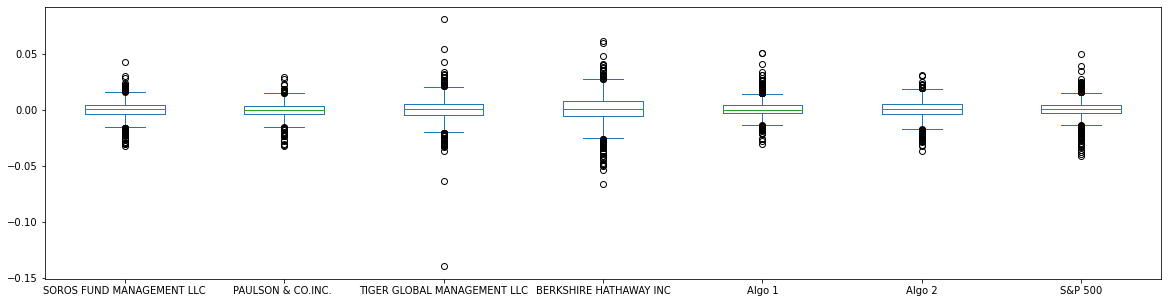

In [222]:
# Box plot to visually show risk
all_prices.plot(kind='box', figsize=(20,5))

### Calculate Standard Deviations

In [223]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_prices.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [224]:
# Calculate  the daily standard deviation of S&P 500
daily_std.loc['S&P 500'].item()
# Determine which portfolios are riskier than the S&P 500
for x in daily_std:
    if x > daily_std.loc['S&P 500'].item():
        print(x)
#or sort        
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

0.010893969618743005
0.012918618441883491


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
dtype: float64

### Calculate the Annualized Standard Deviation

In [225]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

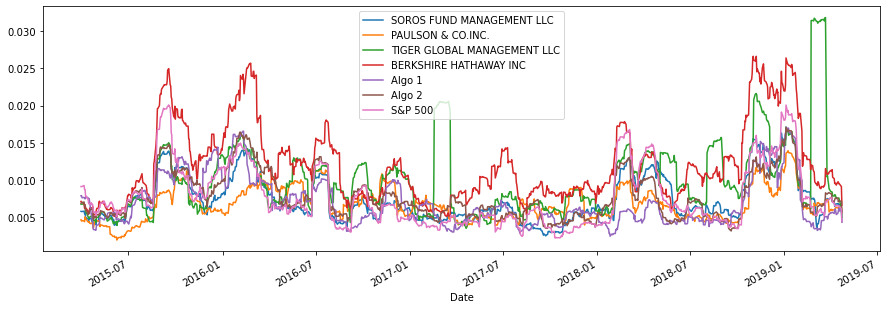

In [226]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_prices_rolling_std = all_prices.rolling(window=21).std()
# Plot the rolling standard deviation
all_prices_rolling_std.plot(figsize=(15,5))

### Calculate and plot the correlation

In [227]:
# Calculate the correlation
corr = all_prices.corr()
# Display de correlation matrix
corr.style.background_gradient(cmap="winter")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

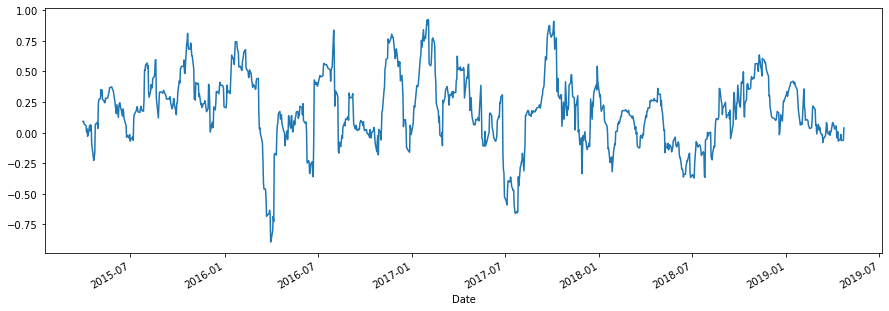

In [228]:
# Calculate covariance of a single portfolio
covariance = all_prices['Algo 1'].rolling(window=21).cov(all_prices['S&P 500'])
# Calculate variance of S&P 500
variance = all_prices['S&P 500'].rolling(window=21).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(15,5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

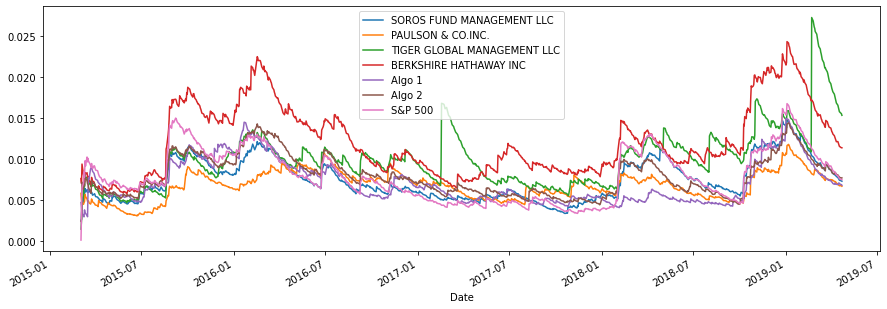

In [229]:
# Use `ewm` to calculate the rolling window
all_prices.ewm(halflife=21).std().plot(figsize=(15,5))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [230]:
# Annualized Sharpe Ratios
sharp_ratios = (all_prices.mean()*252) / (all_prices.std()*np.sqrt(252))
sharp_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:>

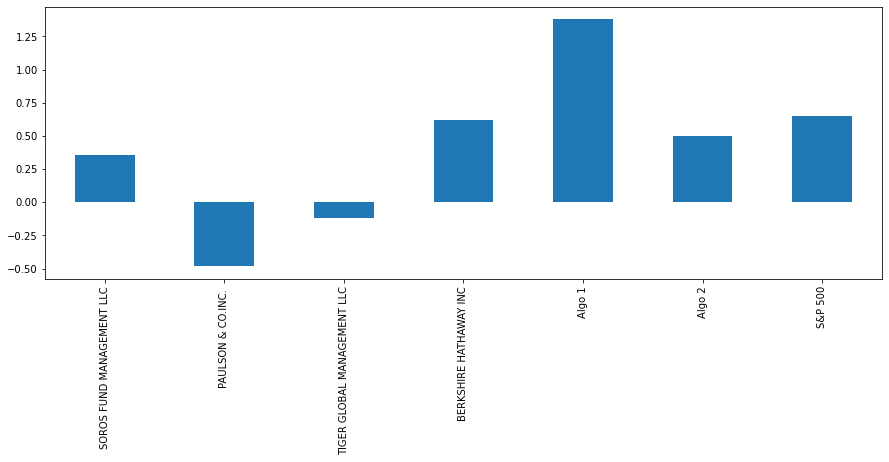

In [231]:
# Visualize the sharpe ratios as a bar plot
sharp_ratios.plot(kind="bar", figsize=(15,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

I'd say Algo 1 outperformed the market significantly, as well as the whales portfolios. It has the highest returns and sharp ratio. Algo 2 is not as good, underperforming where Algo 1 excels.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [232]:
# Reading data from 1st stock
goog_data = Path("goog_historical.csv")
goog = pd.read_csv(
    goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
goog.sort_index(inplace=True)
goog.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [233]:
# Reading data from 2nd stock
cost_data = Path("cost_historical.csv")
cost = pd.read_csv(
    cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
cost.sort_index(inplace=True)
cost.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [234]:
# Reading data from 3rd stock
aapl_data = Path("aapl_historical.csv")
aapl = pd.read_csv(
    aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
aapl.sort_index(inplace=True)
aapl.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [238]:
# Combine all stocks in a single DataFrame
all_prices2 = pd.concat([cost,aapl,goog], axis="rows", join="inner")
all_prices2

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [239]:
# Reset Date all_prices2 = all_prices2.reset_index()
all_prices2 = all_prices2.reset_index()
all_prices2 

,Trade DATE,Symbol,NOCP
0,2018-05-11,COST,195.76
1,2018-05-14,COST,195.88
2,2018-05-15,COST,195.48
3,2018-05-16,COST,198.71
4,2018-05-17,COST,199.60
...,...,...,...
745,2019-05-03,GOOG,1185.40
746,2019-05-06,GOOG,1189.39
747,2019-05-07,GOOG,1174.10
748,2019-05-08,GOOG,1166.27


In [240]:
# Reorganize portfolio data by having a column per symbol
all_prices2 = all_prices2.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
all_prices2

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [253]:
# Calculate daily returns
daily_returns2 = all_prices2.pct_change()
# Drop NAs
daily_returns2.dropna(inplace=True)
# Display sample data
daily_returns2.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [264]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns2.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [265]:
# Join your returns DataFrame to the original returns DataFrame
daily_returns3 = pd.concat([daily_returns2, portfolio_returns], axis="columns", join="inner")
daily_returns3.head()

,AAPL,COST,GOOG,0
Trade DATE,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000015
2018-05-15,-0.009088,-0.002042,-0.019060,-0.010064
2018-05-16,0.009333,0.016523,0.002354,0.009403
2018-05-17,-0.006324,0.004479,-0.002940,-0.001595
2018-05-18,-0.003637,-0.003206,-0.011339,-0.006061


In [267]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns3.dropna()

,AAPL,COST,GOOG,0
Trade DATE,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000015
2018-05-15,-0.009088,-0.002042,-0.019060,-0.010064
2018-05-16,0.009333,0.016523,0.002354,0.009403
2018-05-17,-0.006324,0.004479,-0.002940,-0.001595
2018-05-18,-0.003637,-0.003206,-0.011339,-0.006061
...,...,...,...,...
2019-05-03,0.012431,0.007953,0.019602,0.013329
2019-05-06,-0.015443,-0.001594,0.003366,-0.004557
2019-05-07,-0.026957,-0.016583,-0.012855,-0.018798


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [268]:
# Calculate the annualized `std`
annualized_std2 = daily_returns3.std() * np.sqrt(252)
annualized_std2

AAPL    0.296955
COST    0.209320
GOOG    0.263554
0       0.210262
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

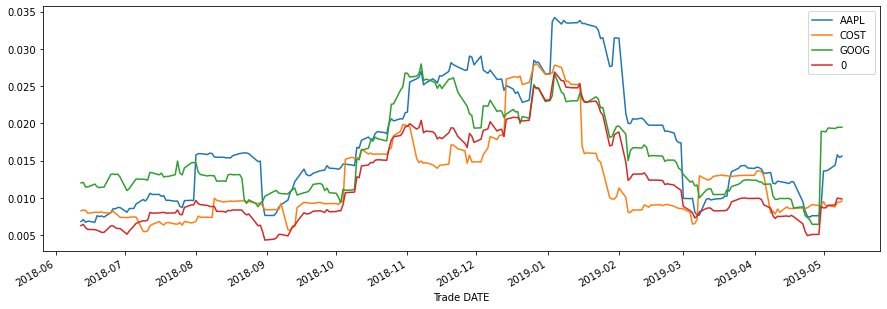

In [269]:
# Calculate rolling standard deviation
all_prices_rolling_std2 = daily_returns3.rolling(window=21).std()
# Plot rolling standard deviation
all_prices_rolling_std2.plot(figsize=(15,5))

### Calculate and plot the correlation

In [275]:
# Calculate and plot the correlation
corr = daily_returns3.corr()
corr.style.background_gradient(cmap="winter")

,AAPL,COST,GOOG,0
AAPL,1.000000,0.413546,0.655007,0.881676
COST,0.413546,1.000000,0.385145,0.687446
GOOG,0.655007,0.385145,1.000000,0.853984
0,0.881676,0.687446,0.853984,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

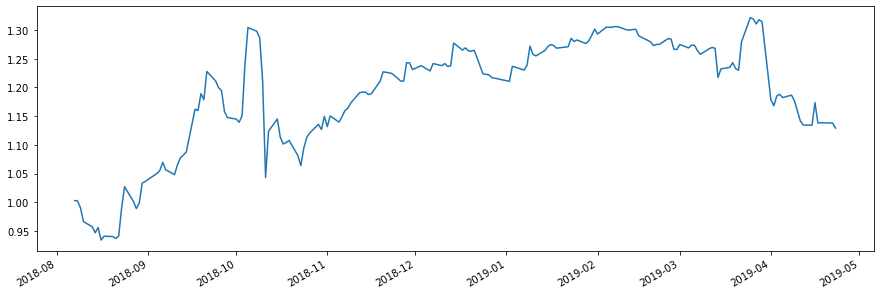

In [274]:
# Calculate and plot Beta
covariance2 = portfolio_returns.rolling(window=60).cov(all_prices['S&P 500'])
variance2 = all_prices['S&P 500'].rolling(window=60).var()
# Computing beta
beta2 = covariance2 / variance2
# Plot beta trend
beta2.plot(figsize=(15,5))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [277]:
# Calculate Annualized Sharpe Ratios
sharp_ratios2 = (daily_returns3.mean()*252) / (daily_returns3.std()*np.sqrt(252))
sharp_ratios2

AAPL    0.361306
COST    1.160482
GOOG    0.349657
0       0.701280
dtype: float64

<AxesSubplot:>

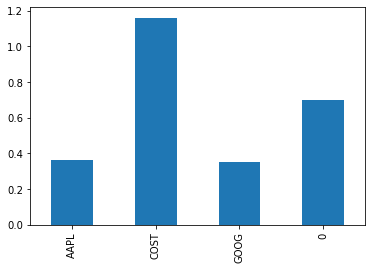

In [279]:
# Visualize the sharpe ratios as a bar plot
sharp_ratios2.plot(kind="bar")

### How does your portfolio do?

My portfolio did pretty well, it was maily held up by the profits from COST. Compared to the previous portfolios it did not do as well as some of the Algos but still managed to beat out a whale:

<AxesSubplot:>

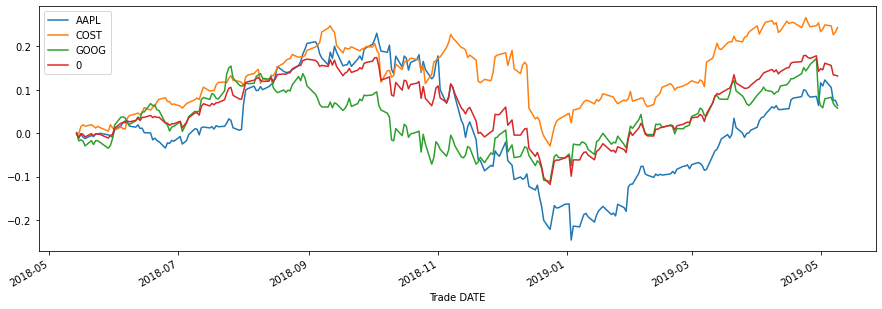

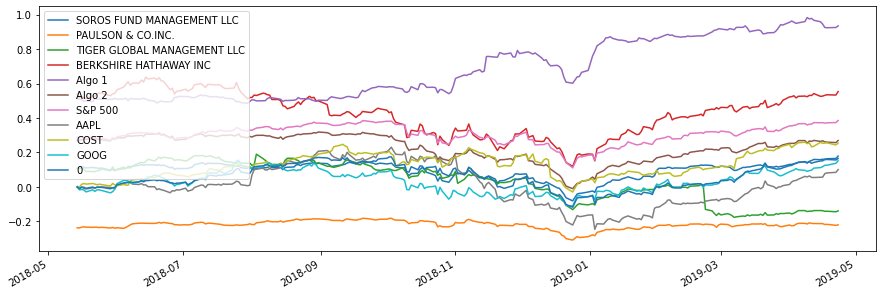

In [290]:
cumulative_returns2 = (1 + daily_returns3).cumprod() - 1
cumulative_returns2.plot(figsize=(15,5))
cumulative_returns3 = pd.concat([cumulative_returns, cumulative_returns2], axis="columns", join="inner")
cumulative_returns3.plot(figsize=(15,5))